<a href="https://colab.research.google.com/github/YangliuF95/glove-python/blob/master/HSBM_topics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Install graph-tool
!echo "deb http://downloads.skewed.de/apt bionic main" >> /etc/apt/sources.list
!apt-key adv --keyserver keyserver.ubuntu.com --recv-key 612DEFB798507F25
!apt-get update
!apt-get install python3-graph-tool python3-matplotlib python3-cairo

#python3-cairo from Ubuntu's reposity is linked with a different python version; we need to improvise
!apt purge python3-cairo
!pip3 install --force-reinstall pycairo


In [ ]:
!apt purge python3-cairo
!pip install wheel
!pip install --force-reinstall pycairo 

In [ ]:
!apt-get install libcairo2-dev 
!pip install pycairo

In [ ]:
from graph_tool.all import *

g = collection.data["celegansneural"]
state = minimize_nested_blockmodel_dl(g)

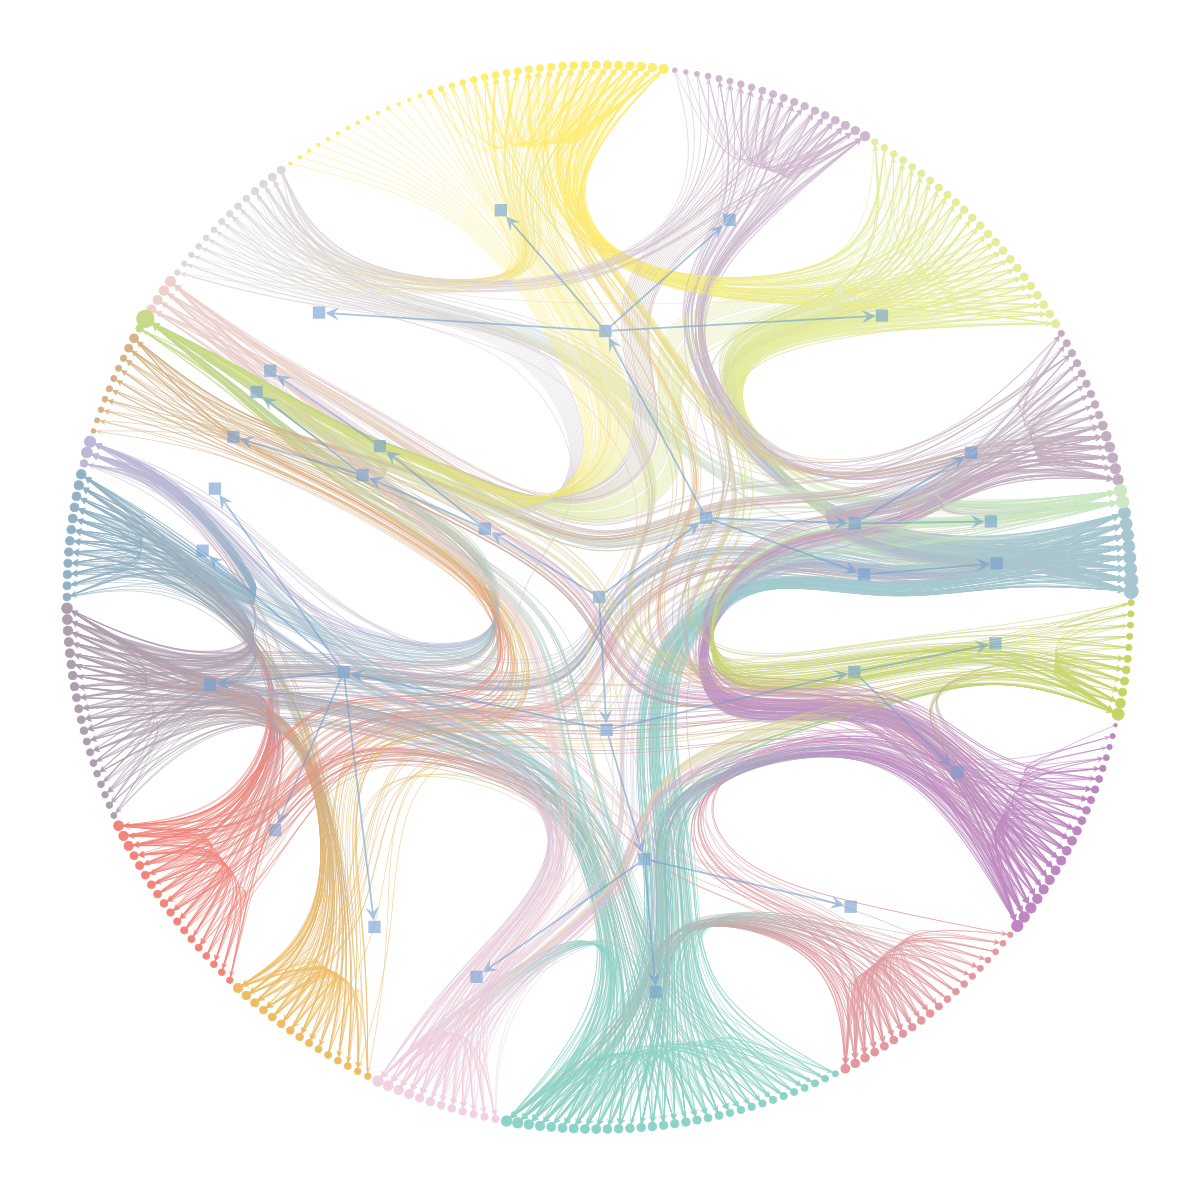

(<VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8d7663ad90, at 0x7f8d8badd150>,
 <Graph object, directed, with 329 vertices and 328 edges, at 0x7f8d800f0f90>,
 <VertexPropertyMap object with value type 'vector<double>', for Graph 0x7f8d800f0f90, at 0x7f8d76668310>)

In [ ]:
# example 
state.draw()

In [ ]:
#@title hsbm topic model
from google.colab import drive
drive.mount('/content/drive')
import requests
for filename in ['corpus.txt','titles.txt','sbmtm.py','TopSBM-tutorial.ipynb']:
    url = 'https://raw.githubusercontent.com/martingerlach/hSBM_Topicmodel/master/%s'%filename
    with open(filename,'w') as f:
        f.write(requests.get(url).text)

In [ ]:
import pandas as pd
paper=pd.read_csv('/content/drive/My Drive/Colab Notebooks/data_10_20.csv')
paper=paper.dropna(subset=['Abstract']).reset_index(drop=True)

In [ ]:
docs = [eval(i)[:-1] for i in paper['docs']]

In [ ]:
import sbmtm
model = sbmtm.sbmtm()
model.make_graph(docs,documents=['%d'%i for i in range(len(docs))])

In [ ]:
model.save_graph(filename = '/content/drive/My Drive/graph.xml.gz')

In [ ]:
model.load_graph(filename = '/content/drive/My Drive/graph.xml.gz')

In [ ]:
model.fit()

In [ ]:
model.topics(l=1,n=200)

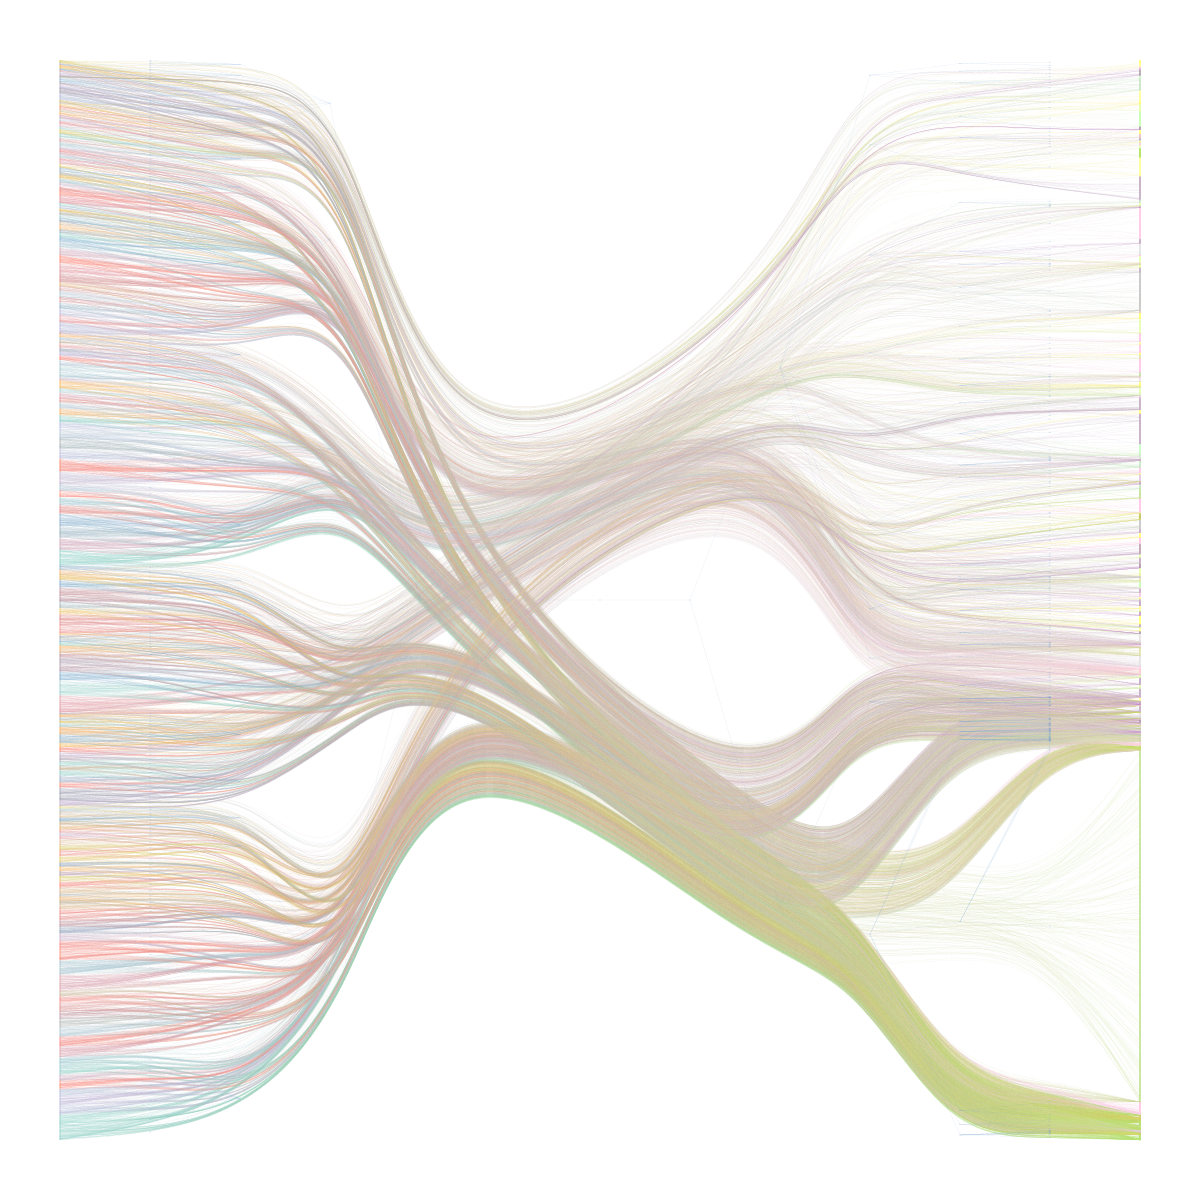

In [ ]:
model.plot(nedges=10000)

In [ ]:
p_td_d,p_tw_w = model.group_membership(l=1)

In [ ]:
p_td_d.shape

(27, 11909)

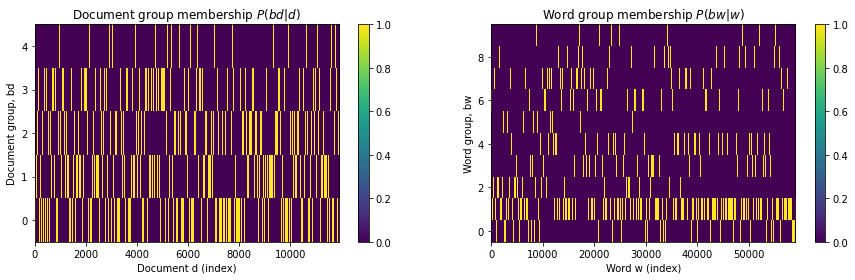

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,4))
plt.subplot(121)
plt.imshow(p_td_d,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Document group membership $P(bd | d)$')
plt.xlabel('Document d (index)')
plt.ylabel('Document group, bd')
plt.colorbar()

plt.subplot(122)
plt.imshow(p_tw_w,origin='lower',aspect='auto',interpolation='none')
plt.title(r'Word group membership $P(bw | w)$')
plt.xlabel('Word w (index)')
plt.ylabel('Word group, bw')
plt.colorbar()
plt.savefig('group_member_level_2.png')

In [ ]:
data.to_csv('Topic_level_0.csv',index=False)
data_1.to_csv('Topic_level_1.csv',index=False)
data_2.to_csv('Topic_level_2.csv',index=False)
data_3.to_csv('Topic_level_3.csv',index=False)
data_4.to_csv('Topic_level_4.csv',index=False)

In [ ]:
data=pd.DataFrame(model.topics(l=0, n=300).items())
data_1=pd.DataFrame(model.topics(l=1,n=300).items())
data_2=pd.DataFrame(model.topics(l=2,n=300).items())
data_3=pd.DataFrame(model.topics(l=3,n=500).items())
data_4=pd.DataFrame(model.topics(l=4,n=500).items())

In [ ]:
data1=pd.DataFrame(model.clusters(l=0,n=10000).items())
data2=pd.DataFrame(model.clusters(l=1, n=len(paper)).items())
data3=pd.DataFrame(model.clusters(l=2, n=len(paper)).items())

In [ ]:
data1.to_csv('cluster_level_0.csv',index=False)
data2.to_csv('cluster_level_1.csv',index=False)
data3.to_csv('cluster_level_2.csv',index=False)

In [ ]:
import numpy as np
np.argmax(p_td_d, axis=0)

array([0, 1, 2, ..., 1, 3, 6])

In [ ]:
p_td_d[1]

array([0., 1., 0., ..., 1., 0., 0.])